In [1]:
# ================================
# STEP 1: Import Required Libraries
# ================================

# ----- Basic Data Handling -----
import pandas as pd              # for reading, cleaning, and analyzing data
import numpy as np               # for numerical operations and array handling

# ----- Data Visualization -----
import matplotlib.pyplot as plt   # for plotting charts and graphs
import seaborn as sns             # for prettier, statistical visualizations

# ----- Machine Learning (scikit-learn) -----
from sklearn.model_selection import train_test_split    # to split dataset into train/validation/test
from sklearn.preprocessing import OneHotEncoder, StandardScaler  # encoding categorical + scaling numeric features
from sklearn.compose import ColumnTransformer           # to apply transformations to specific columns
from sklearn.pipeline import Pipeline                   # to create a full ML pipeline
from sklearn.linear_model import LinearRegression        # linear regression algorithm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  # model evaluation metrics

# ----- Panel Regression (Econometrics) -----
from linearmodels.panel import PanelOLS                 # for fixed-effects / panel regression
import statsmodels.api as sm                            # used internally by PanelOLS for summaries etc.

# ----- Display Settings -----
pd.set_option('display.max_columns', None)   # show all columns when printing dataframes
sns.set(style="whitegrid")                   # set a clean style for plots
print("✅ Libraries imported successfully!")


✅ Libraries imported successfully!


In [3]:
# ============================
# STEP 2: Load the Dataset
# ============================

# Load the final merged dataset
df = pd.read_csv("../data/cleaned/final_merged_dataset.csv")

# Display first 5 rows
print("✅ Dataset loaded successfully!")
display(df.head())


✅ Dataset loaded successfully!


,State,Crime_Type,Year,Cases,unemployment_rate,poverty_rate,per_capita_income,inflation_rate,population_density,gender_ratio,literacy_rate,youth_population_percent,urbanization_rate,human_development_index,police_stations_per_district,conviction_rate,police_personnel_per_100k,alcohol_consumption_per_capita
0,Andaman & Nicobar Islands,Burglary,2001,2818,5.88,38.54,21691.80,4.40,10,915,61.94,24.00,22.0,0.535,6,37.0,59,2.30
1,Andaman & Nicobar Islands,Burglary,2002,2402,4.80,37.61,22162.42,7.63,10,904,62.09,26.98,21.4,0.528,7,41.1,55,2.05
2,Andaman & Nicobar Islands,Burglary,2003,4155,5.75,36.41,22868.34,2.43,17,912,62.32,27.96,24.8,0.543,5,42.2,64,2.18
3,Andaman & Nicobar Islands,Burglary,2004,1299,5.98,37.11,23056.59,5.83,14,910,62.38,27.94,23.2,0.548,7,41.3,57,2.06
4,Andaman & Nicobar Islands,Burglary,2005,1873,5.70,35.07,23480.14,5.63,17,913,62.52,23.92,24.6,0.553,5,36.4,61,2.59


🔹 Shape of dataset: (6930, 18)

🔹 Column names:
 ['State', 'Crime_Type', 'Year', 'Cases', 'unemployment_rate', 'poverty_rate', 'per_capita_income', 'inflation_rate', 'population_density', 'gender_ratio', 'literacy_rate', 'youth_population_percent', 'urbanization_rate', 'human_development_index', 'police_stations_per_district', 'conviction_rate', 'police_personnel_per_100k', 'alcohol_consumption_per_capita']


,State,Crime_Type,Year,Cases,unemployment_rate,poverty_rate,per_capita_income,inflation_rate,population_density,gender_ratio,literacy_rate,youth_population_percent,urbanization_rate,human_development_index,police_stations_per_district,conviction_rate,police_personnel_per_100k,alcohol_consumption_per_capita
0,Andaman & Nicobar Islands,Burglary,2001,2818,5.88,38.54,21691.80,4.40,10,915,61.94,24.00,22.0,0.535,6,37.0,59,2.30
1,Andaman & Nicobar Islands,Burglary,2002,2402,4.80,37.61,22162.42,7.63,10,904,62.09,26.98,21.4,0.528,7,41.1,55,2.05
2,Andaman & Nicobar Islands,Burglary,2003,4155,5.75,36.41,22868.34,2.43,17,912,62.32,27.96,24.8,0.543,5,42.2,64,2.18
3,Andaman & Nicobar Islands,Burglary,2004,1299,5.98,37.11,23056.59,5.83,14,910,62.38,27.94,23.2,0.548,7,41.3,57,2.06
4,Andaman & Nicobar Islands,Burglary,2005,1873,5.70,35.07,23480.14,5.63,17,913,62.52,23.92,24.6,0.553,5,36.4,61,2.59



--- Summary Statistics ---


,Year,Cases,unemployment_rate,poverty_rate,per_capita_income,inflation_rate,population_density,gender_ratio,literacy_rate,youth_population_percent,urbanization_rate,human_development_index,police_stations_per_district,conviction_rate,police_personnel_per_100k,alcohol_consumption_per_capita
count,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000,6930.000000
mean,2011.500000,2602.713420,5.897364,28.075610,48335.532675,4.983247,103.270130,901.533766,69.921675,25.178312,37.020779,0.652336,10.174026,36.987662,103.738961,2.669688
std,6.344747,1384.327412,0.994195,4.293755,39523.696963,1.419813,96.061581,27.151033,7.350325,2.948810,8.139293,0.054179,4.173605,6.252405,20.232866,0.560403
min,2001.000000,21.000000,2.800000,18.600000,5712.000000,2.000000,10.000000,850.000000,54.960000,16.580000,17.000000,0.484000,5.000000,22.100000,54.000000,1.170000
25%,2006.000000,1544.250000,5.230000,24.980000,23480.140000,3.990000,11.000000,879.000000,64.190000,22.920000,30.400000,0.616000,7.000000,32.200000,89.000000,2.280000
50%,2011.500000,2580.000000,5.955000,27.500000,38289.500000,5.035000,87.000000,904.000000,69.240000,25.650000,36.700000,0.654000,9.000000,37.600000,104.000000,2.650000
75%,2017.000000,3643.750000,6.590000,31.000000,66358.000000,5.950000,165.000000,923.000000,75.070000,27.580000,43.800000,0.691000,13.000000,41.700000,117.000000,3.070000
max,2022.000000,9514.000000,8.550000,39.230000,199643.430000,8.870000,408.000000,952.000000,84.520000,31.000000,54.400000,0.810000,19.000000,51.100000,166.000000,4.070000



--- Column Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6930 entries, 0 to 6929
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   State                           6930 non-null   object 
 1   Crime_Type                      6930 non-null   object 
 2   Year                            6930 non-null   int64  
 3   Cases                           6930 non-null   int64  
 4   unemployment_rate               6930 non-null   float64
 5   poverty_rate                    6930 non-null   float64
 6   per_capita_income               6930 non-null   float64
 7   inflation_rate                  6930 non-null   float64
 8   population_density              6930 non-null   int64  
 9   gender_ratio                    6930 non-null   int64  
 10  literacy_rate                   6930 non-null   float64
 11  youth_population_percent        6930 non-null   float64
 12  urbanization_

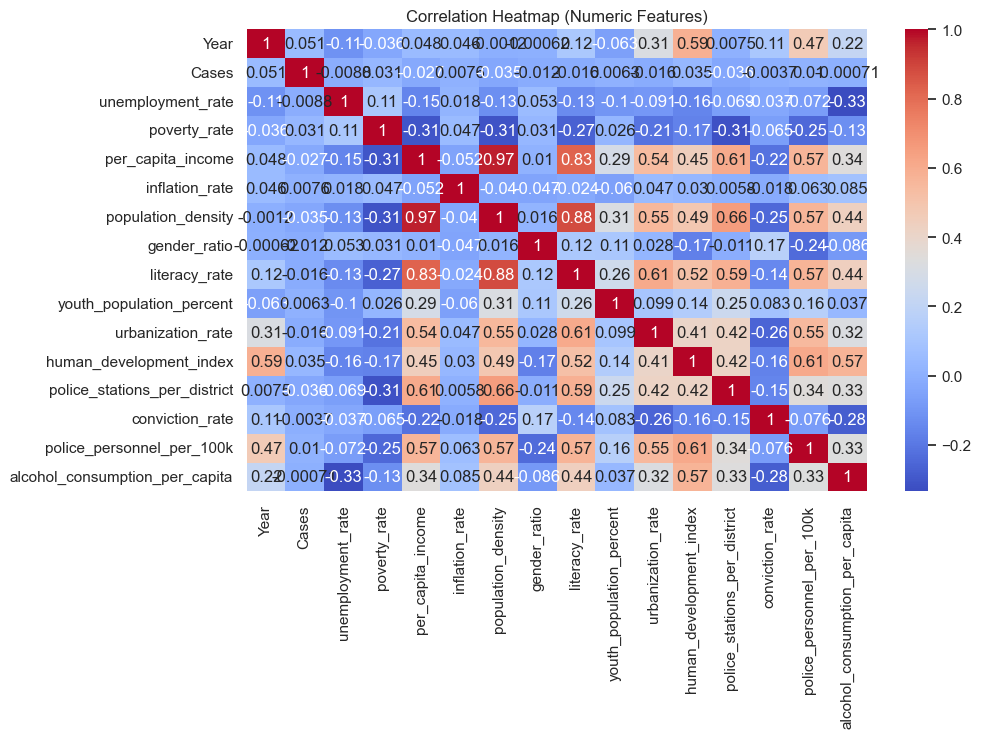

In [4]:
# ================================
# STEP 3: Exploratory Data Analysis (EDA)
# ================================

print("🔹 Shape of dataset:", df.shape)      # number of rows & columns
print("\n🔹 Column names:\n", df.columns.tolist())

# ----- Check first few rows -----
display(df.head())

# ----- Basic statistics for numeric columns -----
print("\n--- Summary Statistics ---")
display(df.describe())

# ----- Data type and null-value info -----
print("\n--- Column Info ---")
df.info()

# ----- Missing value check -----
print("\n--- Missing Values ---")
print(df.isnull().sum())

# ----- Duplicate rows check -----
duplicate_count = df.duplicated().sum()
print(f"\n--- Duplicate Rows: {duplicate_count} ---")

# ----- Unique values in categorical columns (example: State, Crime_Type) -----
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"\nUnique values in '{col}': {df[col].nunique()}")

# ----- Correlation matrix for numeric columns -----
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [5]:
# ============================
# STEP 4: Data Cleaning ✅ (Already Done)
# ============================

# We are using the already cleaned file: final_merged_dataset.csv

# ============================
# STEP 5: Feature Selection
# ============================

# If you already loaded df in Step 2, just make a copy
data = df.copy()

# ----- 1️⃣ View all columns -----
print("Columns in dataset:\n", data.columns.tolist())

# ----- 2️⃣ Define Target (y) -----
# The variable we want to predict → total number of cases
target = 'Cases'
y = data[target]

# ----- 3️⃣ Define Features (X) -----
# Socio-economic factors + identifiers (State, Year, etc.)
features = [
    'State',
    'Crime_Type',
    'Year',
    'unemployment_rate',
    'poverty_rate',
    'per_capita_income',
    'inflation_rate',
    'population_density',
    'gender_ratio',
    'literacy_rate',
    'youth_population_percent',
    'urbanization_rate',
    'human_development_index',
    'police_stations_per_district',
    'conviction_rate',
    'police_personnel_per_100k',
    'alcohol_consumption_per_capita'
]

X = data[features]

# ----- 4️⃣ Quick check -----
print("\n✅ Features (X) and Target (y) selected successfully!")
print("X shape:", X.shape)
print("y shape:", y.shape)

# Display first few rows to verify
display(X.head())
display(y.head())


Columns in dataset:
 ['State', 'Crime_Type', 'Year', 'Cases', 'unemployment_rate', 'poverty_rate', 'per_capita_income', 'inflation_rate', 'population_density', 'gender_ratio', 'literacy_rate', 'youth_population_percent', 'urbanization_rate', 'human_development_index', 'police_stations_per_district', 'conviction_rate', 'police_personnel_per_100k', 'alcohol_consumption_per_capita']

✅ Features (X) and Target (y) selected successfully!
X shape: (6930, 17)
y shape: (6930,)


,State,Crime_Type,Year,unemployment_rate,poverty_rate,per_capita_income,inflation_rate,population_density,gender_ratio,literacy_rate,youth_population_percent,urbanization_rate,human_development_index,police_stations_per_district,conviction_rate,police_personnel_per_100k,alcohol_consumption_per_capita
0,Andaman & Nicobar Islands,Burglary,2001,5.88,38.54,21691.80,4.40,10,915,61.94,24.00,22.0,0.535,6,37.0,59,2.30
1,Andaman & Nicobar Islands,Burglary,2002,4.80,37.61,22162.42,7.63,10,904,62.09,26.98,21.4,0.528,7,41.1,55,2.05
2,Andaman & Nicobar Islands,Burglary,2003,5.75,36.41,22868.34,2.43,17,912,62.32,27.96,24.8,0.543,5,42.2,64,2.18
3,Andaman & Nicobar Islands,Burglary,2004,5.98,37.11,23056.59,5.83,14,910,62.38,27.94,23.2,0.548,7,41.3,57,2.06
4,Andaman & Nicobar Islands,Burglary,2005,5.70,35.07,23480.14,5.63,17,913,62.52,23.92,24.6,0.553,5,36.4,61,2.59


0    2818
1    2402
2    4155
3    1299
4    1873
Name: Cases, dtype: int64

In [8]:
# ============================
# STEP 6: Encode Categorical & Scale Numeric Features
# ============================

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# ----- 1️⃣ Identify categorical and numeric columns -----
cat_cols = ['State', 'Crime_Type']   # categorical features
num_cols = [col for col in X.columns if col not in cat_cols]  # all other numeric columns

print("Categorical Columns:", cat_cols)
print("Numeric Columns:", num_cols)

# ----- 2️⃣ Create a ColumnTransformer -----
# This applies different preprocessing to categorical and numeric data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),   # scale numeric features
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols)  # one-hot encode categorical
    ]
)

# ----- 3️⃣ Fit the transformer on the data -----
# (Only to check if it works; actual fitting will happen inside pipeline later)
preprocessor.fit(X)

# ----- 4️⃣ Transform X -----
X_transformed = preprocessor.transform(X)

# ----- 5️⃣ Check the shape after transformation -----
print("\n✅ Preprocessing completed successfully!")
print("Original X shape:", X.shape)
print("Transformed X shape:", X_transformed.shape)


Categorical Columns: ['State', 'Crime_Type']
Numeric Columns: ['Year', 'unemployment_rate', 'poverty_rate', 'per_capita_income', 'inflation_rate', 'population_density', 'gender_ratio', 'literacy_rate', 'youth_population_percent', 'urbanization_rate', 'human_development_index', 'police_stations_per_district', 'conviction_rate', 'police_personnel_per_100k', 'alcohol_consumption_per_capita']

✅ Preprocessing completed successfully!
Original X shape: (6930, 17)
Transformed X shape: (6930, 59)


In [9]:
# ============================
# STEP 7: Train / Validation / Test Split (60 / 20 / 20)
# ============================

from sklearn.model_selection import train_test_split

# Step 1️⃣: Split into Train (60%) and Temp (40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_transformed, y, test_size=0.4, random_state=42
)

# Step 2️⃣: Split Temp (40%) into Validation (20%) and Test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# Step 3️⃣: Display shapes to verify split ratios
print("✅ Data split successfully!")
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


✅ Data split successfully!
Training set shape: (4158, 59) (4158,)
Validation set shape: (1386, 59) (1386,)
Test set shape: (1386, 59) (1386,)


✅ Linear Regression Model Evaluation Results:
R² Score: -0.0178
Mean Absolute Error (MAE): 1126.06
Root Mean Squared Error (RMSE): 1368.21


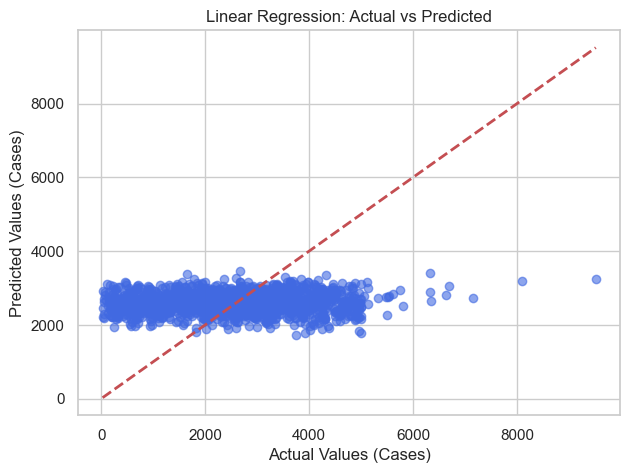

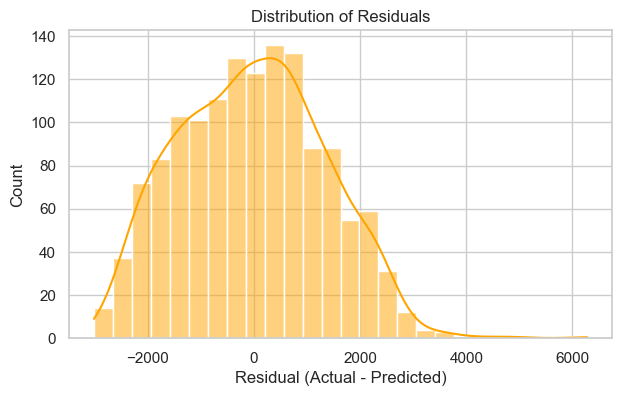

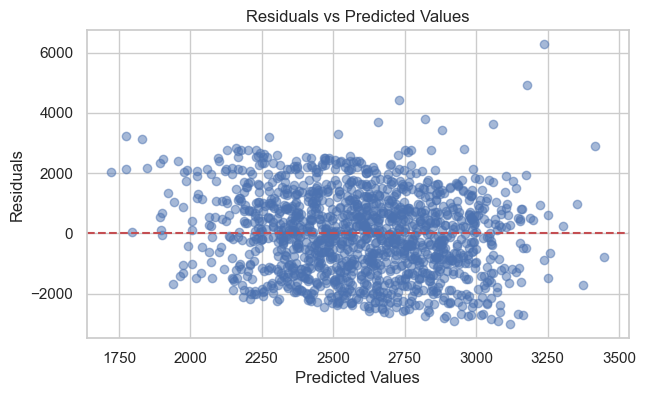

💾 Model saved successfully as 'linear_regression.pkl' in /models folder

🔍 Checking loaded model predictions on sample data:
[2341.597499   3050.16180313 2634.97200735 2704.23214169 2664.47395741]


In [ ]:
# ============================================
# STEP 8 : LINEAR REGRESSION MODEL
# ============================================

# -------------- Import Required Libraries --------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle   # for saving the model

# -------------- 1️⃣ Initialize the Model --------------
linear_model = LinearRegression()

# -------------- 2️⃣ Train (Fit) the Model --------------
linear_model.fit(X_train, y_train)

# -------------- 3️⃣ Predict on Validation Set --------------
y_val_pred = linear_model.predict(X_val)

# -------------- 4️⃣ Evaluate the Model --------------
r2 = r2_score(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_val_pred)

print("✅ Linear Regression Model Evaluation Results:")
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# -------------- 5️⃣ Plot Actual vs Predicted --------------
plt.figure(figsize=(7,5))
plt.scatter(y_val, y_val_pred, alpha=0.6, color='royalblue')
plt.xlabel("Actual Values (Cases)")
plt.ylabel("Predicted Values (Cases)")
plt.title("Linear Regression: Actual vs Predicted")
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', linewidth=2)
plt.show()

# -------------- 6️⃣ Residual Analysis --------------
residuals = y_val - y_val_pred

# Histogram of residuals
plt.figure(figsize=(7,4))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Distribution of Residuals")
plt.xlabel("Residual (Actual - Predicted)")
plt.show()

# Residuals vs Predicted Values
plt.figure(figsize=(7,4))
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.axhline(0, color='r', linestyle='--')
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

# -------------- 7️⃣ Save the Model (as .pkl) --------------
# Save the trained model for future use
with open("../model/linear_regression.pkl", "wb") as file:
    pickle.dump(linear_model, file)

print("💾 Model saved successfully as 'linear_regression.pkl' in /model folder")

# -------------- 8️⃣ (Optional) Load and Check Saved Model --------------
with open("../model/linear_regression.pkl", "rb") as file:
    loaded_model = pickle.load(file)

# Test that loaded model works correctly
sample_pred = loaded_model.predict(X_val[:5])
print("\n🔍 Checking loaded model predictions on sample data:")
print(sample_pred)
